# Linear Regresion with One Variable (Lecture: 01)

__Author__: Pablo César Rodríguez Aguayo

__Subject__: Machine Learning

__Date__: 02/02/2018

In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from terminaltables import AsciiTable
from numpy.polynomial.polynomial import polyfit
sns.set(color_codes=True)

In [3]:
# MSE
def calculate_MSE(theta_0, theta_1, data_):
    totalError = 0
    for i in range(0, len(data_)):
        x = data_[i, 0]
        y = data_[i, 1]
        totalError += (y - (theta_0 + theta_1 * x)) ** 2
    return totalError/float(len(data_))

In [7]:
# Cost Function
def update_J(theta_0, theta_1, data_, alpha):
    theta_0g = 0
    theta_1g = 0
    M = float(len(data_))
    for i in range(0, int(M)):
        x = data_[i, 0]
        y = data_[i, 1]
        theta_0g += -(1/M) * (y - (theta_0 + (theta_1 * x)))
        theta_1g += -(1/M) * (y - (theta_0 + (theta_1 * x))) * x
        
    new_theta_0 = theta_0 - (alpha * theta_0g)
    new_theta_1 = theta_1 - (alpha * theta_1g)
    # print("{0} -- {1}".format(new_theta_0, new_theta_1))
    return [new_theta_0, new_theta_1]

In [8]:
# Gradiente Descent Algorithm
def calculate_GDA(data_, strt_theta_0=0.0, strt_theta_1=0.0, alpha=0.001, iterations=1000):
    theta_0 = strt_theta_0
    theta_1 = strt_theta_1
    for i in range(iterations):
        theta_0, theta_1 = update_J(theta_0, theta_1, np.array(data_), alpha)
    return [theta_0, theta_1]

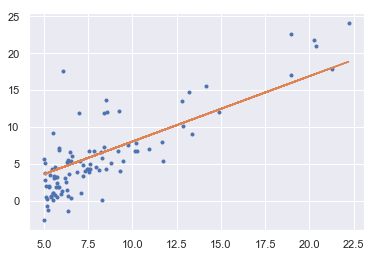

+------------+-----------------+
| Parameter  | Value           |
+------------+-----------------+
| Iterations | 1500            |
| Theta 0    | -0.862212179535 |
| Theta 1    | 0.888278763828  |
| Error      | 10.6295303012   |
+------------+-----------------+


In [9]:
def main():
    np.set_printoptions(precision=30)
    data = np.genfromtxt("data.csv", delimiter=",")
    alpha = 0.001 # learning rate
    theta_0 = 0 # interception with y
    theta_1 = 0 # slope of the function
    iterations = 1500
    [theta_0, theta_1] = calculate_GDA(data, theta_0, theta_1, alpha, iterations)
    error = calculate_MSE(theta_0, theta_1, data)
    
    table_data = [
        ['Parameter', 'Value'],
        ['Iterations', '{0}'.format(iterations)],
        ['Theta 0', '{0}'.format(theta_0)],
        ['Theta 1', '{0}'.format(theta_1)],
        ['Error', '{0}'.format(error)]
    ]
    
    table = AsciiTable(table_data)
    
    
    df = pd.DataFrame(data, columns=['x', 'y'])
    Y = theta_0 + theta_1 * df.x
    # Fit with polyfit
    t0, t1 = polyfit(df.x, Y, 1)
    plt.plot(df.x, df.y, '.', label='h(x)={0} + {1}x'.format(theta_0, theta_1))
    plt.plot(df.x, t0 + t1 * df.x, '-')
    plt.show()
    print(table.table)
    
if __name__ == '__main__':
    if sys.path[0] == '':
        del sys.path[0]
    main()